In [102]:
import folium
import pandas as pd
import numpy as np

In [103]:
def create_marker(
    lat: float,
    lon: float,
    content: str
) -> folium.Marker:
    """
    Create a marker with a popup.
    """
    biofuelicon = folium.features.CustomIcon(
        '../.github/biomass-energy.png',
        icon_size=(45, 45)
    )
    return folium.Marker(
        location=[lat, lon],
        popup=folium.Popup(content, max_width=1500),
        icon=biofuelicon
    )


def generate_marker_content(
    business_name: str,
    address: str,
    address_no: str,
    city: str,
    state: str,
    zip_code: int,
    biofuel: str,
    route: str,
    volume: int,
    lat: float,
    long: float,
) -> folium.Html:
    return folium.Html(
        f"""
        <h6><strong>{business_name}</strong></h6>
        <strong>Adress: </strong>{address}, {address_no}, {city}, {state} - {zip_code}<br>
        <strong>Biofuel: </strong>{biofuel}<br>
        <strong>Volume: </strong>{volume}<br>
        <strong>Route: </strong>{route}<br>
        <a href="https://www.google.com/maps/search/?api=1&query={lat,long}">Open with Google </a>
        """, script=True
    )


In [104]:
def generate_biofuel_plants_map(rf_renovabio_plants_geocoded):
    """
    Generates a map with all the biofuel plants in Brazil.
    """
    
    biofuel_plants_map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4, tiles='OpenStreetMap')

    for index, row in rf_renovabio_plants_geocoded.iterrows():
        marker_content = generate_marker_content(
            row['RAZAO_SOCIAL'],
            row['DS_END'],
            row['NO_END'],
            row['CIDADE'],
            row['UF'],
            row['CEP'],
            row['BIOCOMBUSTIVEL'],
            row['DS_ROTA'],
            int(row['LITROS_CBIO']),
            row['LATITUDE_bing'],
            row['LONGITUDE_bing'],  
        )
        marker = create_marker(
            row['LATITUDE_bing'],
            row['LONGITUDE_bing'],
            marker_content
        )

        marker.add_to(biofuel_plants_map)
    return biofuel_plants_map

[08/13/23 12:01:40] INFO     Loading data from 'refined_renovabio_plants_geocoded'              ]8;id=854731;file://c:\Users\daniel.silva\AppData\Local\miniconda3\envs\kedro-std\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=651457;file://c:\Users\daniel.silva\AppData\Local\miniconda3\envs\kedro-std\lib\site-packages\kedro\io\data_catalog.py#475\475]8;;\
                             (ParquetDataSet)...                                                                   

<folium.folium.Map object at 0x0000029F6D3D58B0>
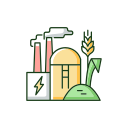
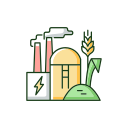
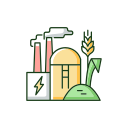
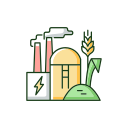
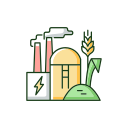
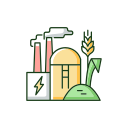
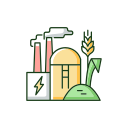
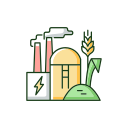
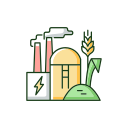
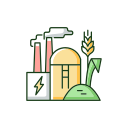
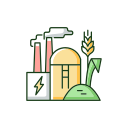
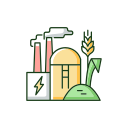
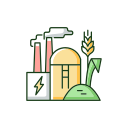
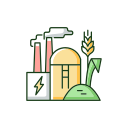
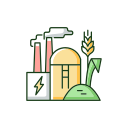
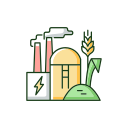
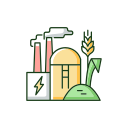
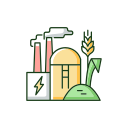
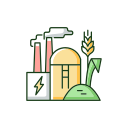
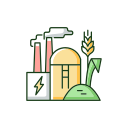
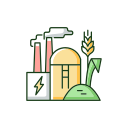
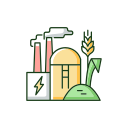
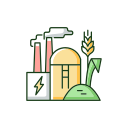
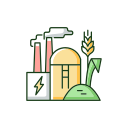
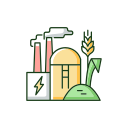
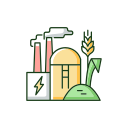
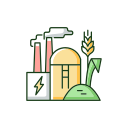
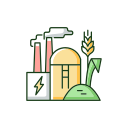
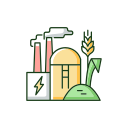
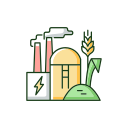
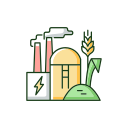
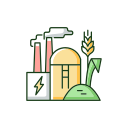
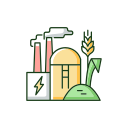
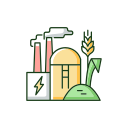
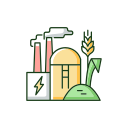
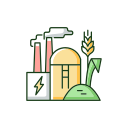
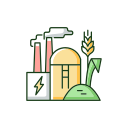
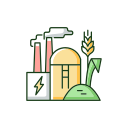
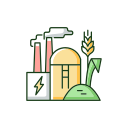
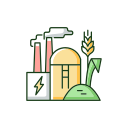
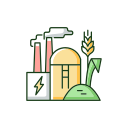
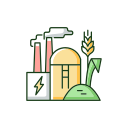
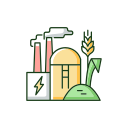
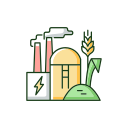
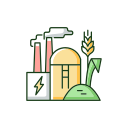
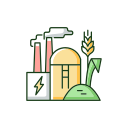
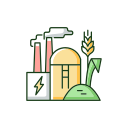
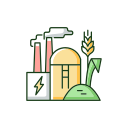
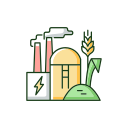
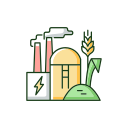
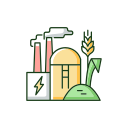
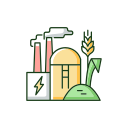
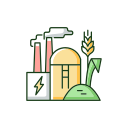
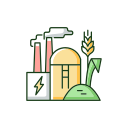
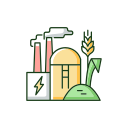
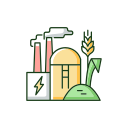
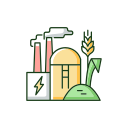
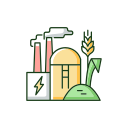
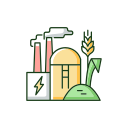
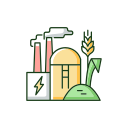
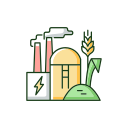
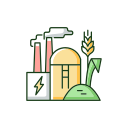
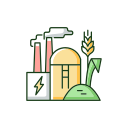
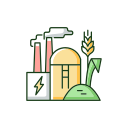
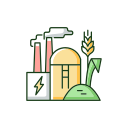
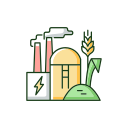
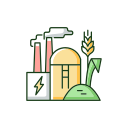
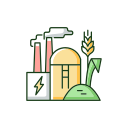
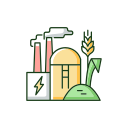
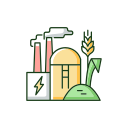
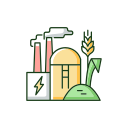
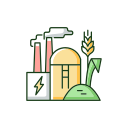
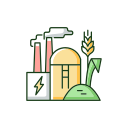
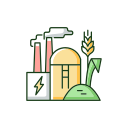
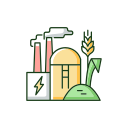
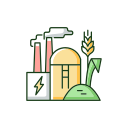
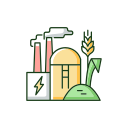
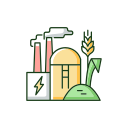
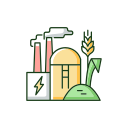
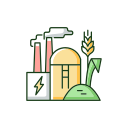
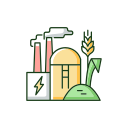
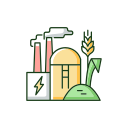
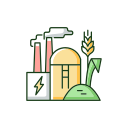
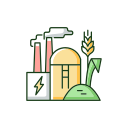
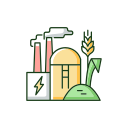
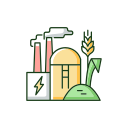
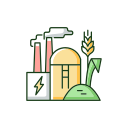
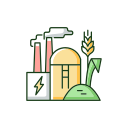
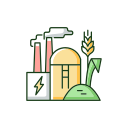
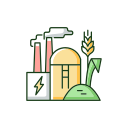
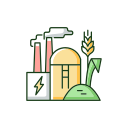
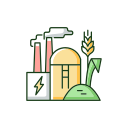
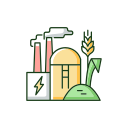
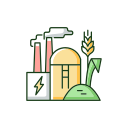
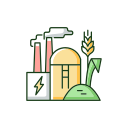
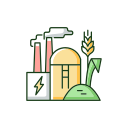
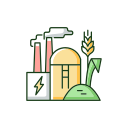
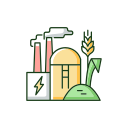
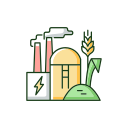
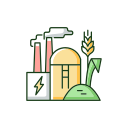
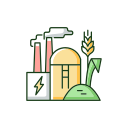
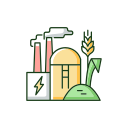
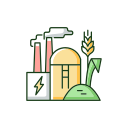
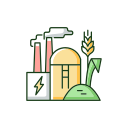
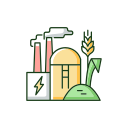
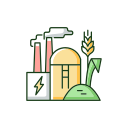
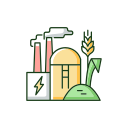
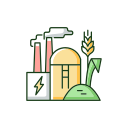
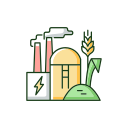
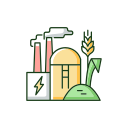
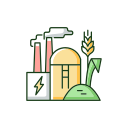
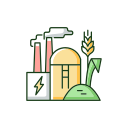
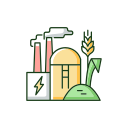
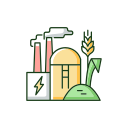
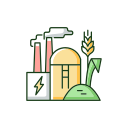
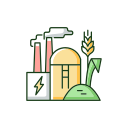
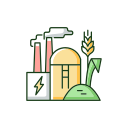
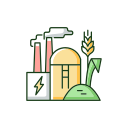
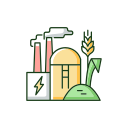
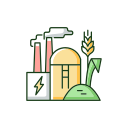
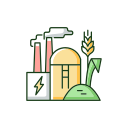
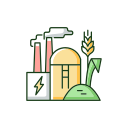
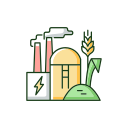
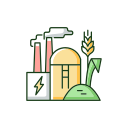
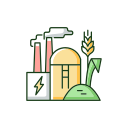
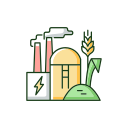
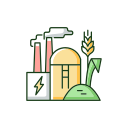
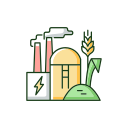
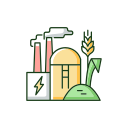
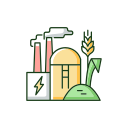
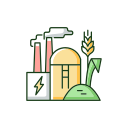
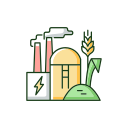
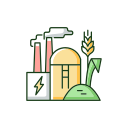
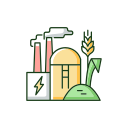
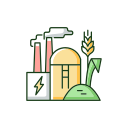
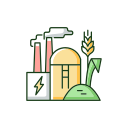
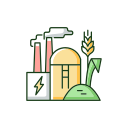
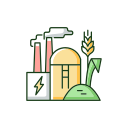
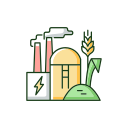
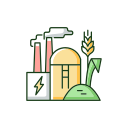
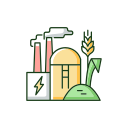
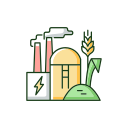
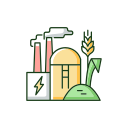
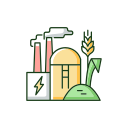
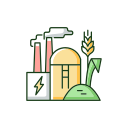
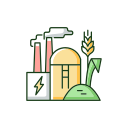
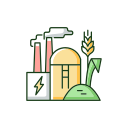
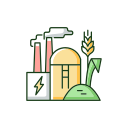
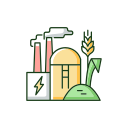
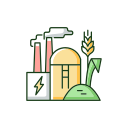
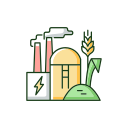
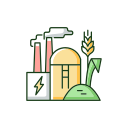
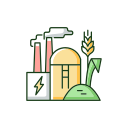
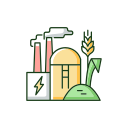
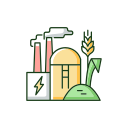
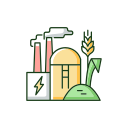
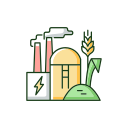
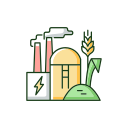
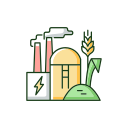
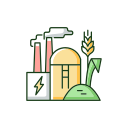
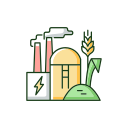
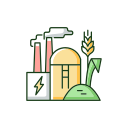
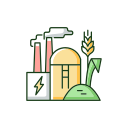
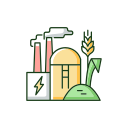
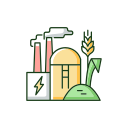
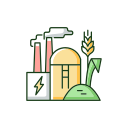
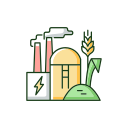
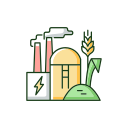
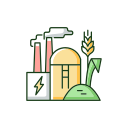
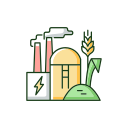
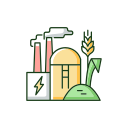
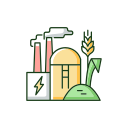
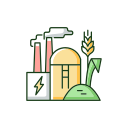
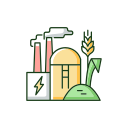
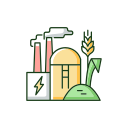
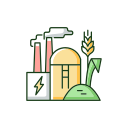
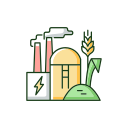
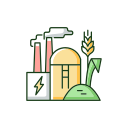
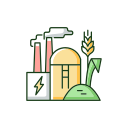
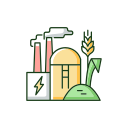
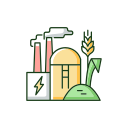
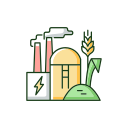
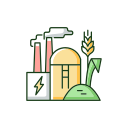
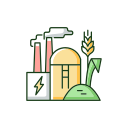
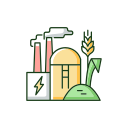
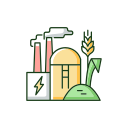
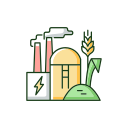
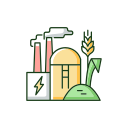
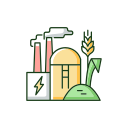
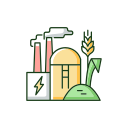
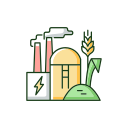
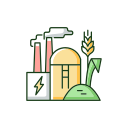
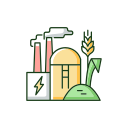
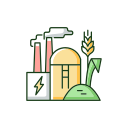
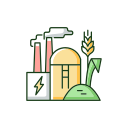
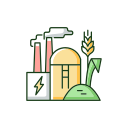
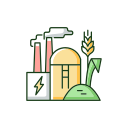
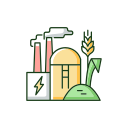
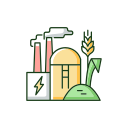
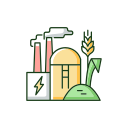
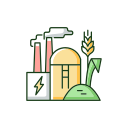
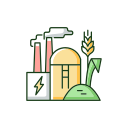
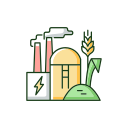
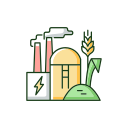
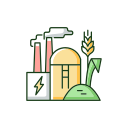
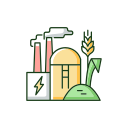
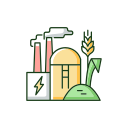
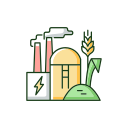
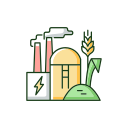
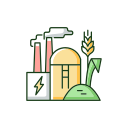
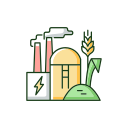
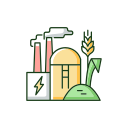
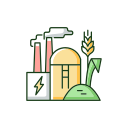
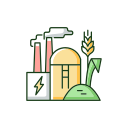
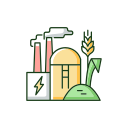
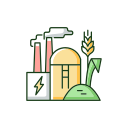
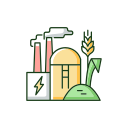
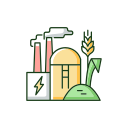
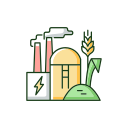
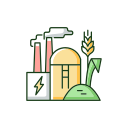
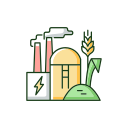
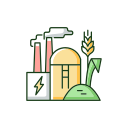
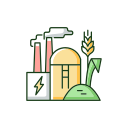
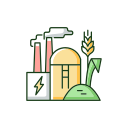
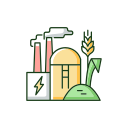
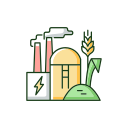
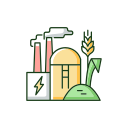
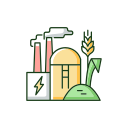
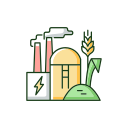
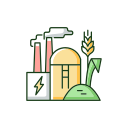
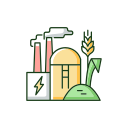
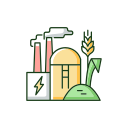
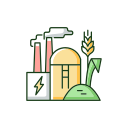
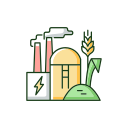
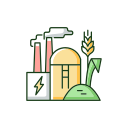
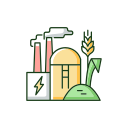
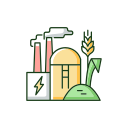
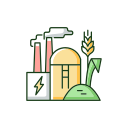
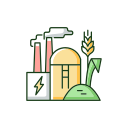
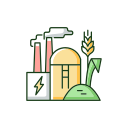
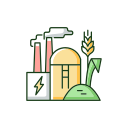
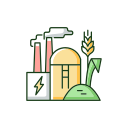
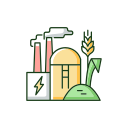
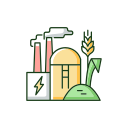
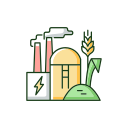
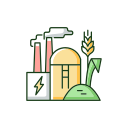
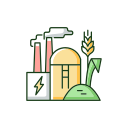
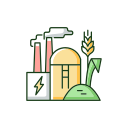
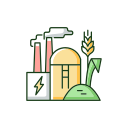
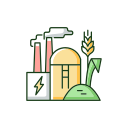
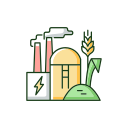
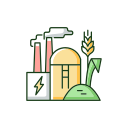
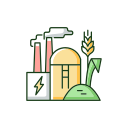
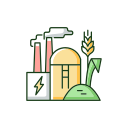
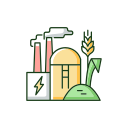
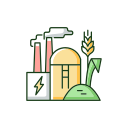
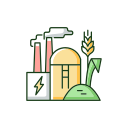
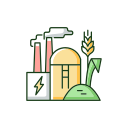
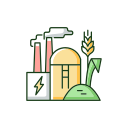
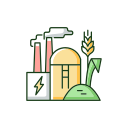
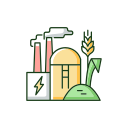
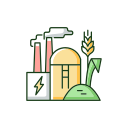
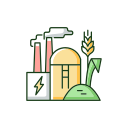
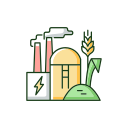
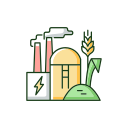
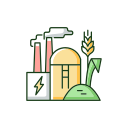
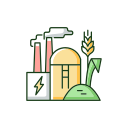
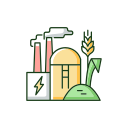
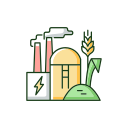
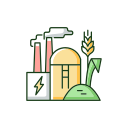
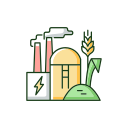
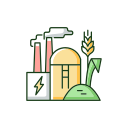
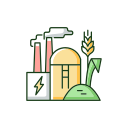
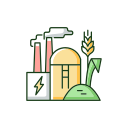
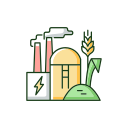
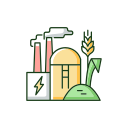
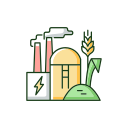
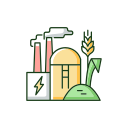
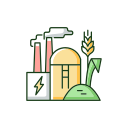
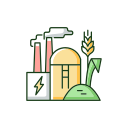
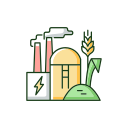
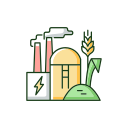
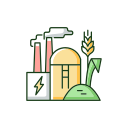
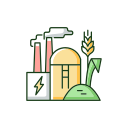
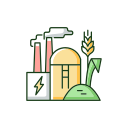
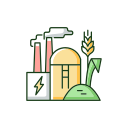
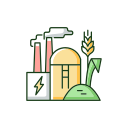
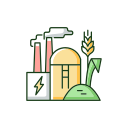
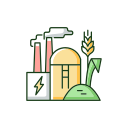
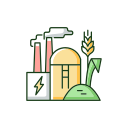
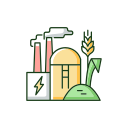
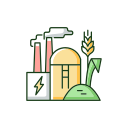
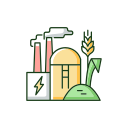
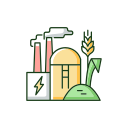
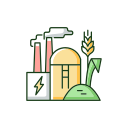
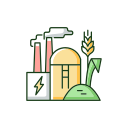
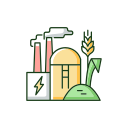
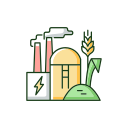
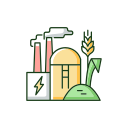
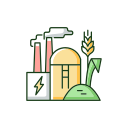
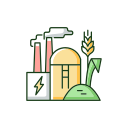
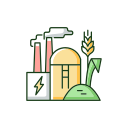
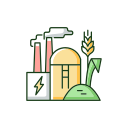
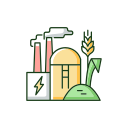
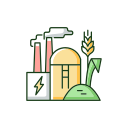
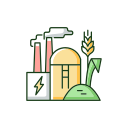
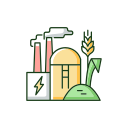
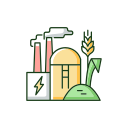
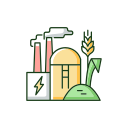
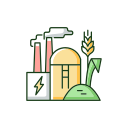
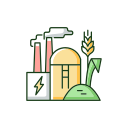
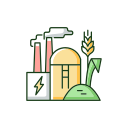
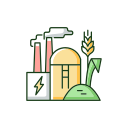
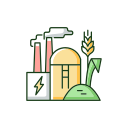
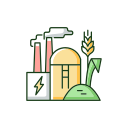
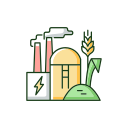
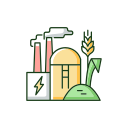
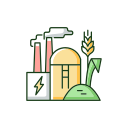
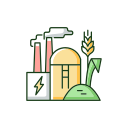
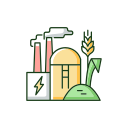
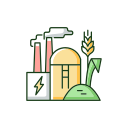
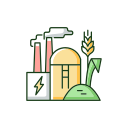
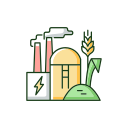
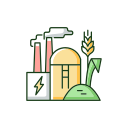
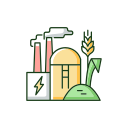
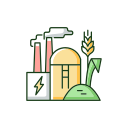
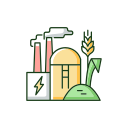
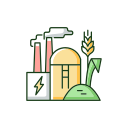
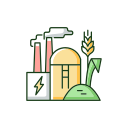
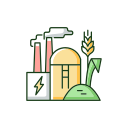
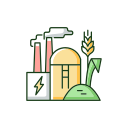
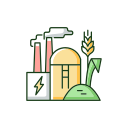
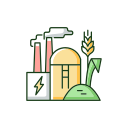
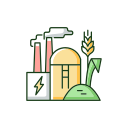
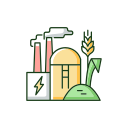
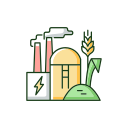
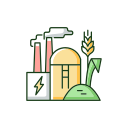
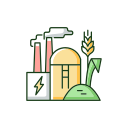
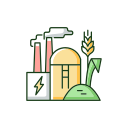
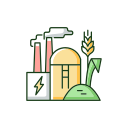
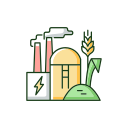
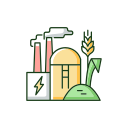
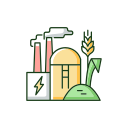
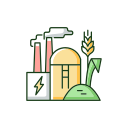
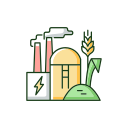
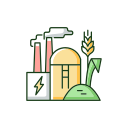
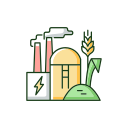
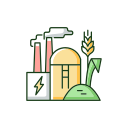
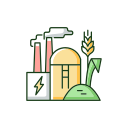
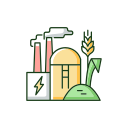
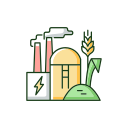
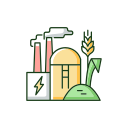
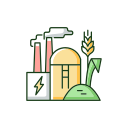
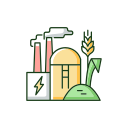
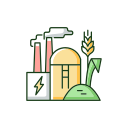
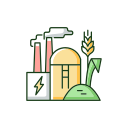
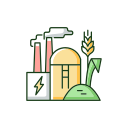
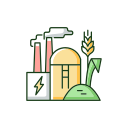
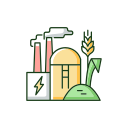
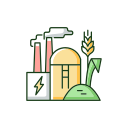
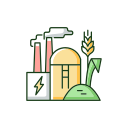
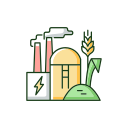
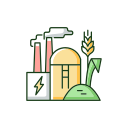
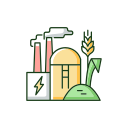
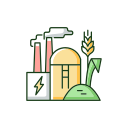
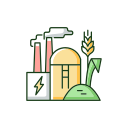
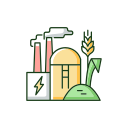
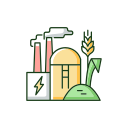
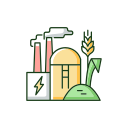
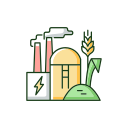
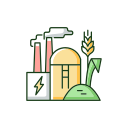
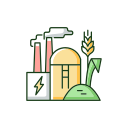
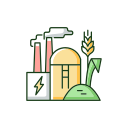
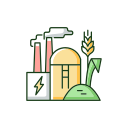
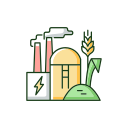
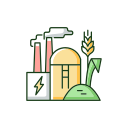
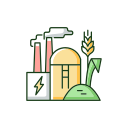
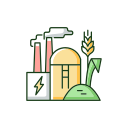
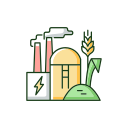
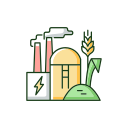
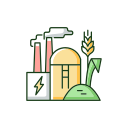
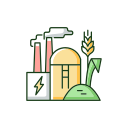
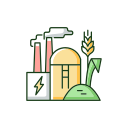
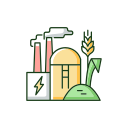
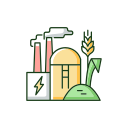
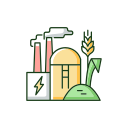
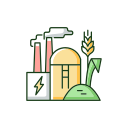
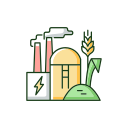
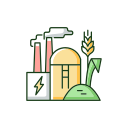
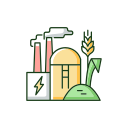
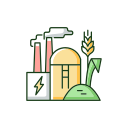
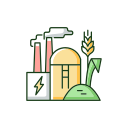
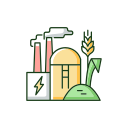
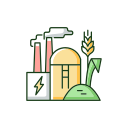
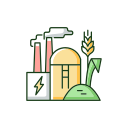
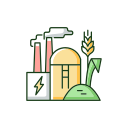
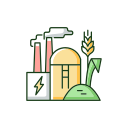
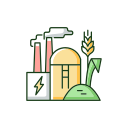
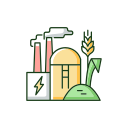
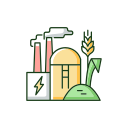
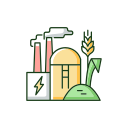
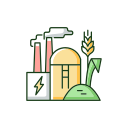
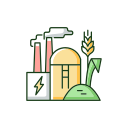
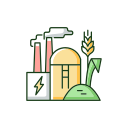
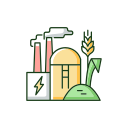
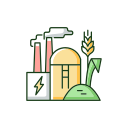
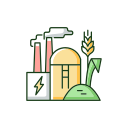
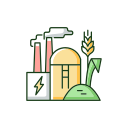
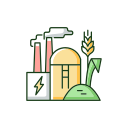
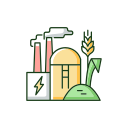
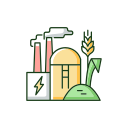
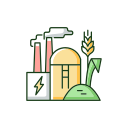
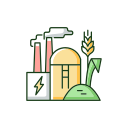
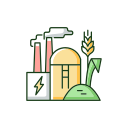
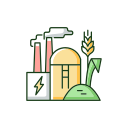
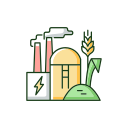
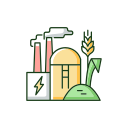
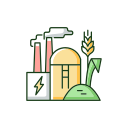
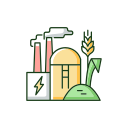
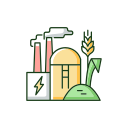
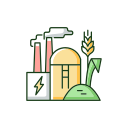
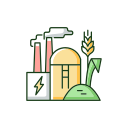
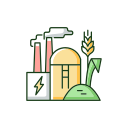
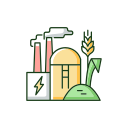
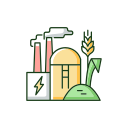
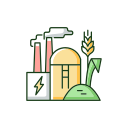
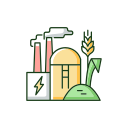
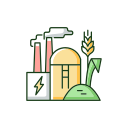
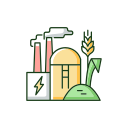
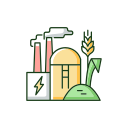
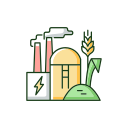
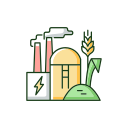
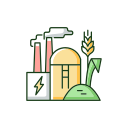
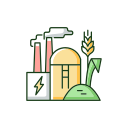
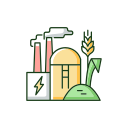
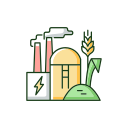
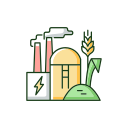
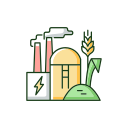
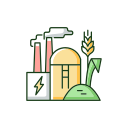
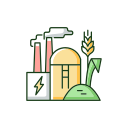
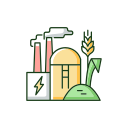
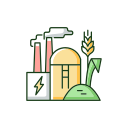
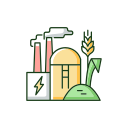
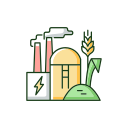
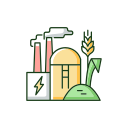
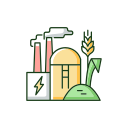
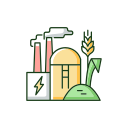
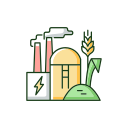
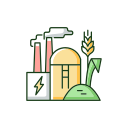
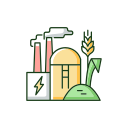
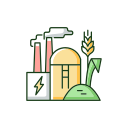
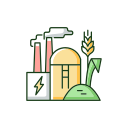
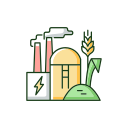
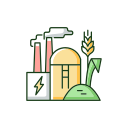
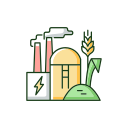
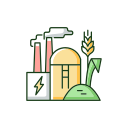
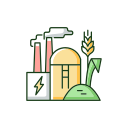
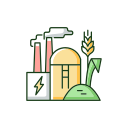
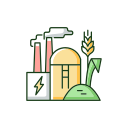
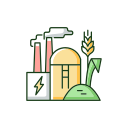
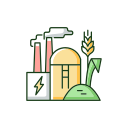
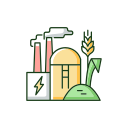
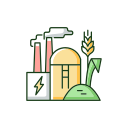
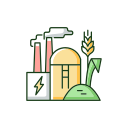
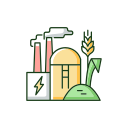
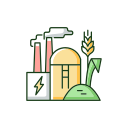
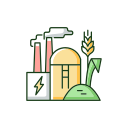
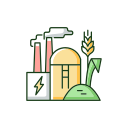
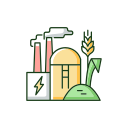
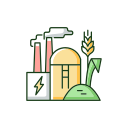
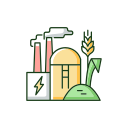
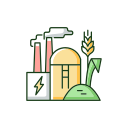
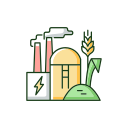
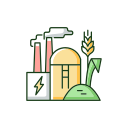
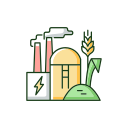
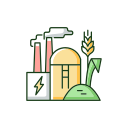
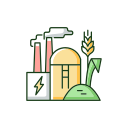
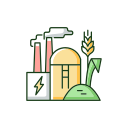
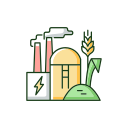
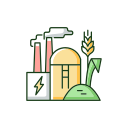
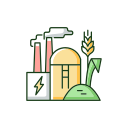
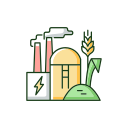
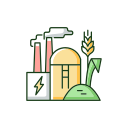
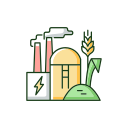
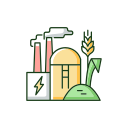
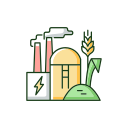
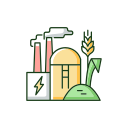
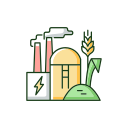
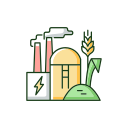
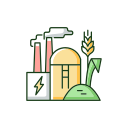
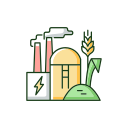
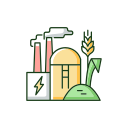
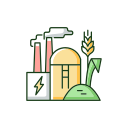
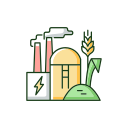
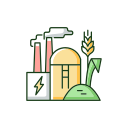
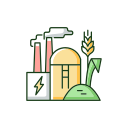
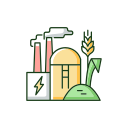
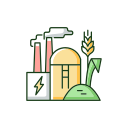
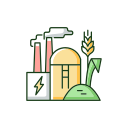
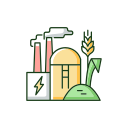
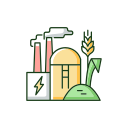
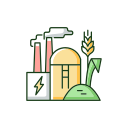
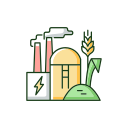
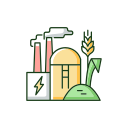
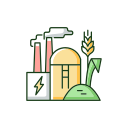
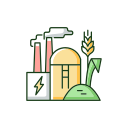

In [105]:
biofuel_plants_map = generate_biofuel_plants_map(catalog.load('refined_renovabio_plants_geocoded'))
biofuel_plants_map